### Introduction
Here we practice on general introduction in Association Rule Mining for the Groceries dataset in python. We will first go through a brief Exploratory Data Analysis and then implement one of most popular Association Rule Learning Model. The aim of this dataset is to identify the association rules for the Market Basket Analysis.
  
  Association Rule Learning (or Associate Rule Mining) is a rule-based machine learning method to discover how items are associated to each other. Stores use them to figure out products that are bought together, this way they can provide different offers to the different customers e.g, buy one get one free. Earlier, recommendation systems like Amazon, Netflix used them. In this notebook, we will go through Apriori type of Association Rule Learning model




In [1]:
import pandas as pd # for data reading and manipulation
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
import numpy as np # for numerical computation

%matplotlib inline

# load the groceries-dataset
groceries = pd.read_csv('Groceries_dataset.csv', parse_dates=['Date'])
groceries.shape

(38765, 3)

In [2]:
# let's take a peek of dataset
groceries.head()


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


## Exploratory Data Analysis

In [3]:
print("We have the data from",groceries.Date.min(),"to", groceries.Date.max())


We have the data from 2014-01-01 00:00:00 to 2015-12-30 00:00:00


In [4]:
# For extracting year,month and day to new column,follow the code:
groceries['year'] = groceries['Date'].dt.year
groceries['month'] = groceries['Date'].dt.month
groceries['day'] = groceries['Date'].dt.day
groceries['day_of_week'] = groceries['Date'].dt.day_name()
groceries.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday


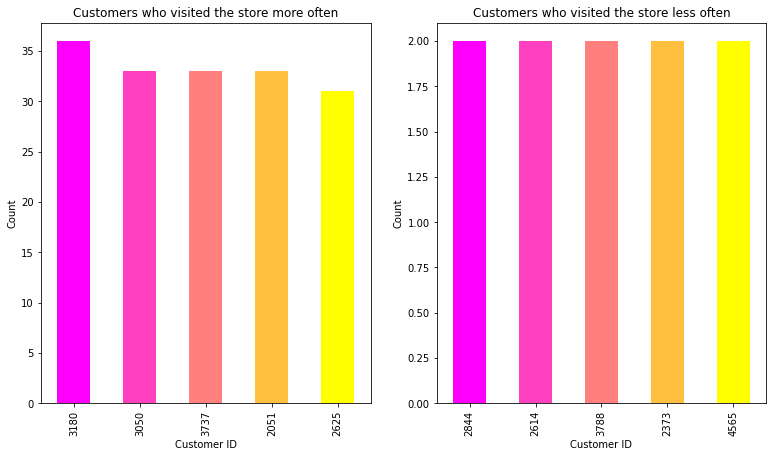

In [5]:
plt.rcParams["figure.figsize"] = [13, 7]

color = plt.cm.spring(np.linspace(0, 1, 5))

fig, (ax, ax2) = plt.subplots(ncols=2)

groceries['Member_number'].value_counts().head().plot(kind='bar', color = color, ax=ax, title='Customers who visited the store more often');
ax.set_xlabel("Customer ID")
ax.set_ylabel("Count")
groceries['Member_number'].value_counts(ascending=True).head().plot(kind='bar', color = color, ax=ax2, title='Customers who visited the store less often');
ax2.set_xlabel("Customer ID")
ax2.set_ylabel("Count");

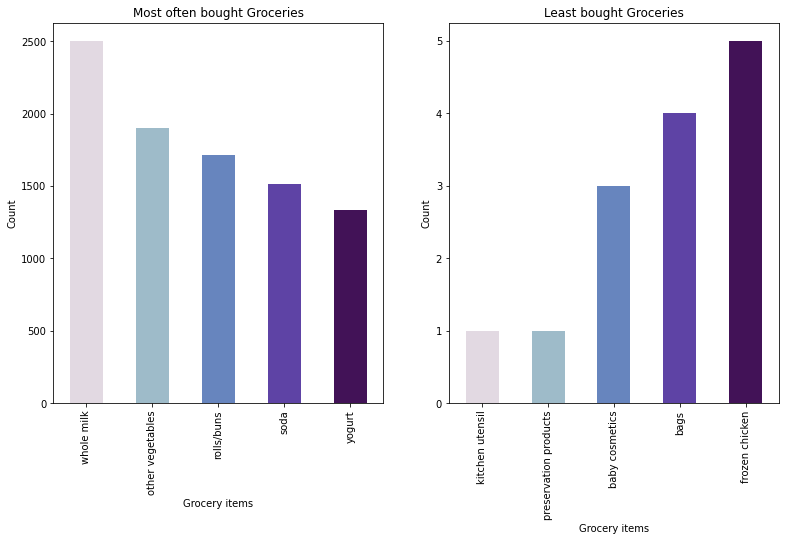

In [6]:
plt.rcParams["figure.figsize"] = [13, 7]
color = plt.cm.twilight(np.linspace(0, 1, 10))

fig, (ax, ax2) = plt.subplots(ncols=2)

groceries['itemDescription'].value_counts().head().plot(kind='bar', color = color, ax=ax, title='Most often bought Groceries');
ax.set_xlabel("Grocery items")
ax.set_ylabel("Count")
groceries['itemDescription'].value_counts(ascending=True).head().plot(kind='bar', color = color, ax=ax2, title='Least bought Groceries');
ax2.set_xlabel("Grocery items")
ax2.set_ylabel("Count");

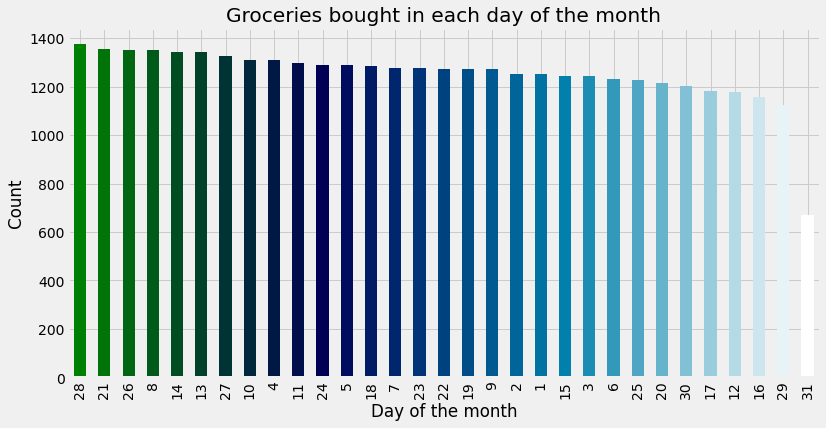

In [7]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [12, 6]
color = plt.cm.ocean(np.linspace(0, 1, 31))

groceries['day'].value_counts().plot(kind='bar', color=color, title='Groceries bought in each day of the month').set(xlabel='Day of the month', ylabel='Count');

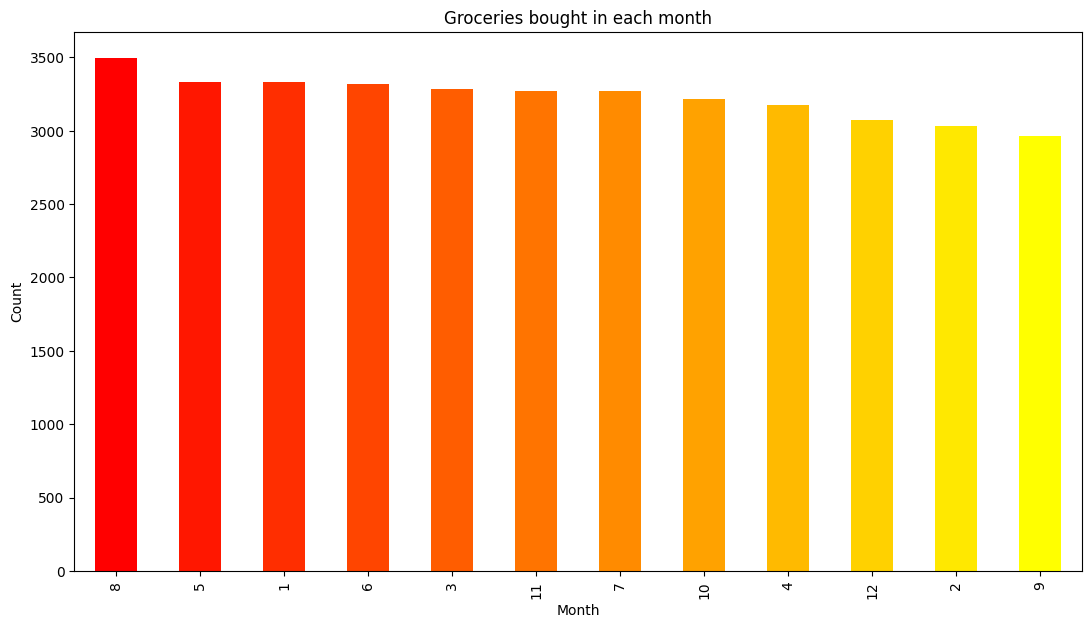

In [8]:
plt.rcdefaults()
plt.rcParams["figure.figsize"] = [13, 7]
color = plt.cm.autumn(np.linspace(0, 1, 12))

groceries['month'].value_counts().plot(kind='bar', color=color, title='Groceries bought in each month').set(xlabel='Month', ylabel='Count');

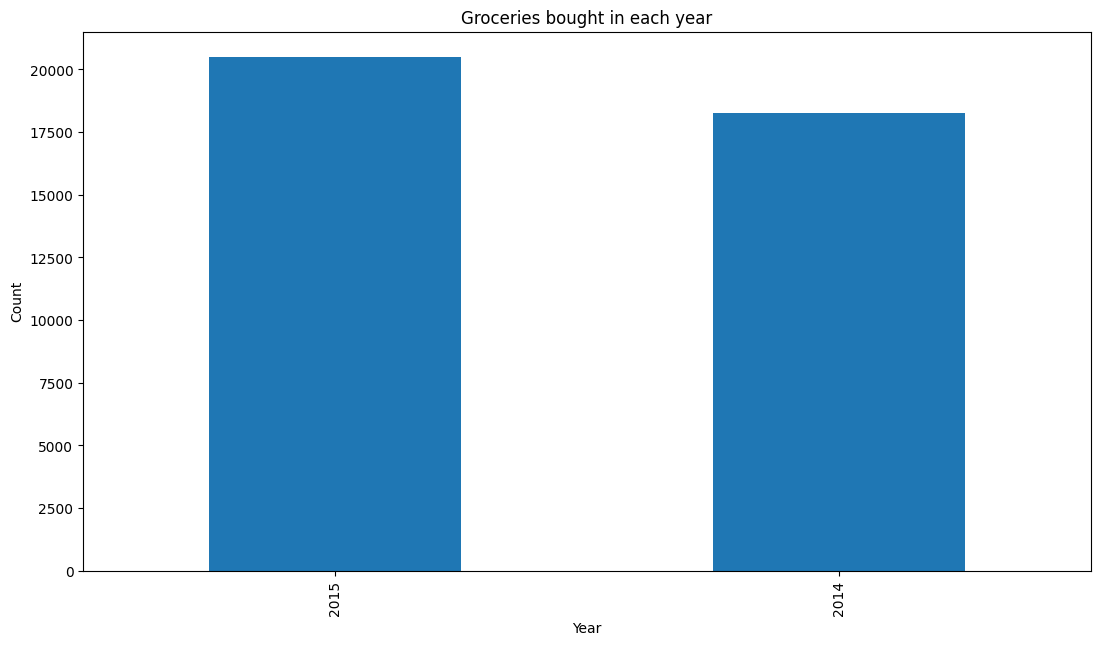

In [9]:
plt.rcdefaults()
plt.rcParams["figure.figsize"] = [13, 7]

groceries['year'].value_counts().plot(kind='bar', title='Groceries bought in each year').set(xlabel='Year', ylabel='Count');

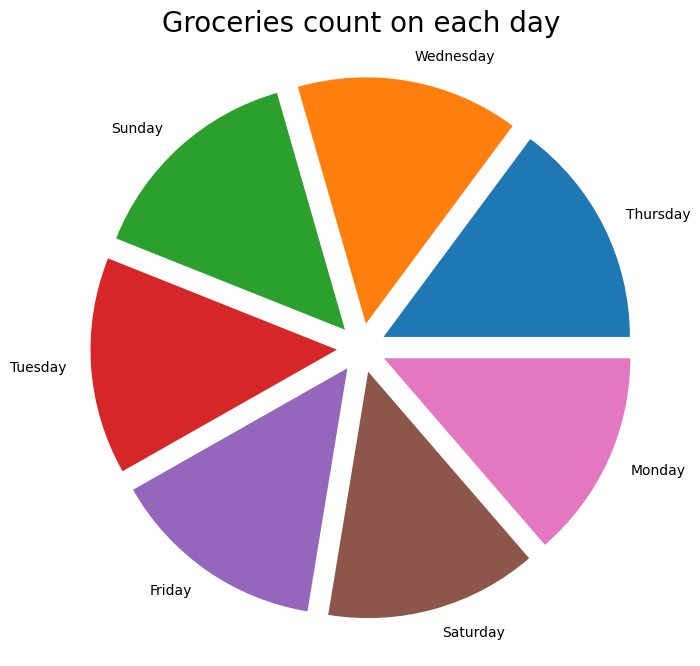

In [10]:
groceries['day_of_week'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Groceries count on each day',fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 90)
plt.show()

In [11]:
# let's aggregate the data with date to see more clearly which items are bought on which date
# create a new dataframe and store unique visitors and unique bought items
groceries_time = pd.DataFrame(groceries.groupby('Date')['itemDescription'].nunique().index)
groceries_time['members_count'] = groceries.groupby('Date')['Member_number'].nunique().values
groceries_time['items_count'] = groceries.groupby('Date')['itemDescription'].nunique().values
groceries_time['items'] = groceries.groupby('Date')['itemDescription'].unique().values
groceries_time.set_index('Date',inplace=True)
groceries_time.head()

,members_count,items_count,items
Date,,,
2014-01-01,21,30,"[cleaner, sausage, tropical fruit, whole milk,..."
2014-01-02,29,45,"[other vegetables, pip fruit, frankfurter, sug..."
2014-01-03,24,36,"[sausage, meat, sugar, bottled beer, whole mil..."
2014-01-04,28,33,"[frankfurter, pastry, salty snack, bottled bee..."
2014-01-05,20,31,"[sausage, root vegetables, whipped/sour cream,..."


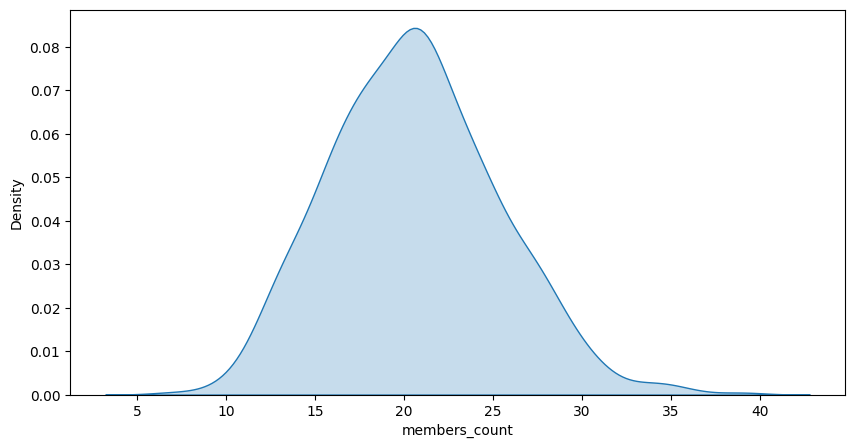

In [12]:
plt.rcParams["figure.figsize"] = [10, 5]

sns.kdeplot(data = groceries_time['members_count'],shade=True);

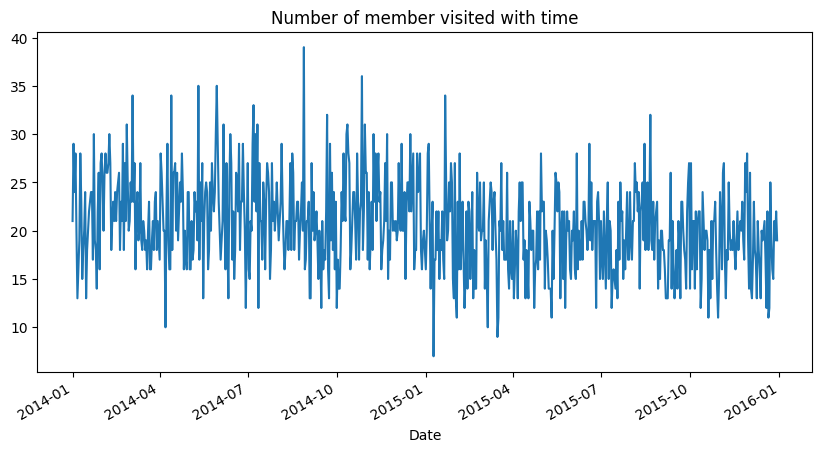

In [13]:
groceries_time['members_count'].plot(figsize=(10, 5),title='Number of member visited with time');


## Associate Rule Learning


### Apriori

In [15]:
#  importing the library
try:
    import apyori
except:
    !pip install apyori

from apyori import apriori # for association rule learning models

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=d8a1b3bf6a17395e5b4c07f77d71c3465235fd6d559d026fc5bf0bee209a9a3c
  Stored in directory: /home/sujan/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [19]:
transactions = groceries_time['items'].tolist()
transactions


[array(['cleaner', 'sausage', 'tropical fruit', 'whole milk',
        'citrus fruit', 'onions', 'other vegetables', 'berries',
        'hamburger meat', 'bottled water', 'butter', 'yogurt', 'waffles',
        'soda', 'sliced cheese', 'curd', 'specialty chocolate',
        'shopping bags', 'flower (seeds)', 'coffee', 'whipped/sour cream',
        'frozen potato products', 'candles', 'bottled beer',
        'Instant food products', 'frozen vegetables', 'brown bread',
        'domestic eggs', 'dishes', 'chocolate'], dtype=object),
 array(['other vegetables', 'pip fruit', 'frankfurter', 'sugar',
        'frozen vegetables', 'beef', 'waffles', 'meat', 'root vegetables',
        'pastry', 'butter', 'brown bread', 'ice cream', 'soda',
        'rolls/buns', 'chicken', 'citrus fruit', 'white bread',
        'frozen fish', 'sparkling wine', 'cream cheese ', 'whole milk',
        'tropical fruit', 'fruit/vegetable juice', 'yogurt',
        'condensed milk', 'curd', 'soft cheese', 'canned beer', '

In [17]:
rules = apriori(transactions = transactions, min_support=0.00030, min_confidance=0.01, min_lift=3, min_length=2, max_length=2)
#let's transform them into a list
results = list(rules)

def inspect(results):
    '''
    function to put the result in well organised pandas dataframe
    '''
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Item #1', 'Item #2', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame.head()

,Item #1,Item #2,Support,Confidence,Lift
0,Instant food products,baby cosmetics,0.002747,0.035088,8.514620
1,Instant food products,bags,0.001374,0.017544,3.192982
2,Instant food products,liqueur,0.004121,0.052632,4.257310
3,abrasive cleaner,cleaner,0.005495,0.181818,4.564263
4,artif. sweetener,baby cosmetics,0.001374,0.035714,8.666667


In [18]:
resultsinDataFrame.nlargest(n=10, columns='Lift')


,Item #1,Item #2,Support,Confidence,Lift
169,liqueur,preservation products,0.001374,0.111111,80.888889
160,kitchen utensil,prosecco,0.001374,1.000000,38.315789
157,kitchen utensil,male cosmetics,0.001374,1.000000,20.800000
203,preservation products,spices,0.001374,1.000000,18.666667
21,bags,frozen fruits,0.001374,0.250000,16.545455
201,preservation products,soups,0.001374,1.000000,15.826087
118,frozen chicken,organic products,0.001374,0.200000,14.560000
92,decalcifier,salad dressing,0.001374,0.111111,13.481481
113,frozen chicken,frozen fruits,0.001374,0.200000,13.236364
81,cream,frozen chicken,0.001374,0.083333,12.133333
